In [88]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import itertools
from matplotlib import cm

import os
import seaborn as sns
from os import listdir
from os.path import isfile, join
import scipy.stats as stats

In [119]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)

In [120]:
csvname = 'May26.csv'
mypath = f'/Volumes/SAF_Data/NAYS2DH_files/Data/BarCSVs/Sp2022/Summer-redo/{csvname}'
allbars = pd.read_csv(mypath, header=0)

allbars['CVFlowDepth'] = allbars['SDFlowDepth']/allbars['MeanFlowDepth']
allbars['CVVelocity'] = allbars['SDVelocity']/allbars['MeanVelocity']
allbars['Skew Abs'] = abs(allbars['Angle Skewness'])
savefilesto = '/Volumes/SAF_Data/Colloquium22/scratch'

In [121]:
# df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”
allbars['TempAgg'] = allbars['MedClinoHt']/allbars['MaxClinoHt']
allbars['Skew Binned'] = allbars['Skew Abs']
allbars.loc[np.logical_or(allbars['Skew Abs'] > 1, allbars['Skew Abs'] < 3), 'Skew Binned'] = 1
allbars.loc[allbars['Skew Abs'] < 1, 'Skew Binned'] = 0
allbars.loc[allbars['Skew Abs'] > 3, 'Skew Binned'] = 2

allbars['Co Binned'] = allbars['Skew Abs']
allbars.loc[np.logical_or(allbars['CoherenceVal'] > 2, allbars['CoherenceVal'] <= 3), 'Co Binned'] = 1
allbars.loc[allbars['CoherenceVal'] <= 2, 'Co Binned'] = 0

allbars.loc[allbars['CoherenceVal'] > 3, 'Co Binned'] = 2

In [122]:
allbars['BSR Binned'] = allbars['Basal Surf Relief']
allbars.loc[np.logical_or(allbars['Basal Surf Relief'] > 0.5, allbars['Basal Surf Relief'] < 1), 'BSR Binned'] = 1
allbars.loc[allbars['Basal Surf Relief'] < 0.5, 'BSR Binned'] = 0
allbars.loc[allbars['Basal Surf Relief'] > 1, 'BSR Binned'] = 2

In [123]:
## recalc facies
d50 = 0.00031
# chezy_rough = 18*(np.log10(4*allbars['MedFlowDepth']/d50)) #i think this is log10, else they would've put ln no?

med_mmp =(1000*(allbars['MedVelocity']**2))/(1650*((18*(np.log10(4*allbars['MedFlowDepth']/d50)))**2)*d50)##### modified mobility parameter
allbars['MeanFacies'] =(1000*(allbars['MeanVelocity']**2))/(1650*((18*(np.log10(4*allbars['MeanFlowDepth']/d50)))**2)*d50)##### modified mobility parameter
allbars['MedFacies'] =(1000*(allbars['MedVelocity']**2))/(1650*((18*(np.log10(4*allbars['MedFlowDepth']/d50)))**2)*d50)##### modified mobility parameter

(array([15., 20., 14., 10.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([0.0149322 , 0.05258381, 0.09023541, 0.12788702, 0.16553863,
        0.20319023, 0.24084184, 0.27849345, 0.31614505, 0.35379666,
        0.39144827]),
 <BarContainer object of 10 artists>)

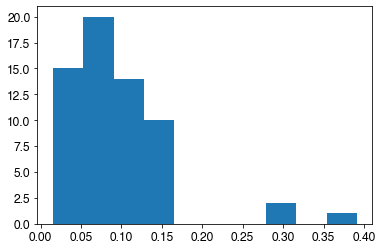

In [124]:
plt.hist(allbars['MeanFacies'])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Basal Surf Relief', ylabel='TempAgg'>

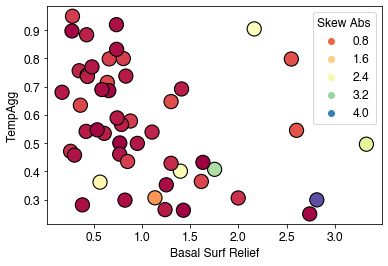

In [95]:
sns.scatterplot(allbars['Basal Surf Relief'], allbars['TempAgg'], hue = allbars['Skew Abs'], s=200, ec = 'k', palette='Spectral', hue_norm=(allbars['Skew Abs'].min(), allbars['Skew Abs'].max()))

Text(0, 0.5, 'Vertical Aggradation')

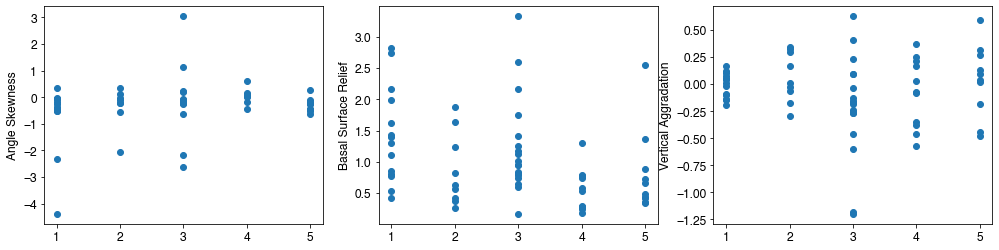

In [145]:
fig, ax = plt.subplots(1, 3, figsize = (17, 4))
ax[0].scatter(allbars['CoherenceVal'], allbars['Angle Skewness'])
ax[1].scatter(allbars['CoherenceVal'], allbars['Basal Surf Relief'])
ax[2].scatter(allbars['CoherenceVal'], allbars['Median dzdx'])

ax[0].set_ylabel('Angle Skewness')
ax[1].set_ylabel('Basal Surface Relief')
ax[2].set_ylabel('Vertical Aggradation')


<Figure size 1080x1080 with 0 Axes>

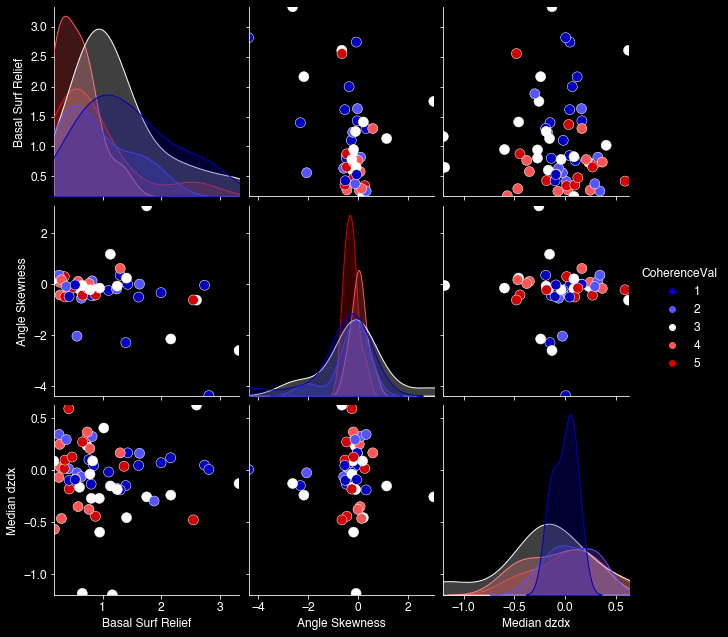

In [132]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(marker="o", linewidth=0.5, s = 100, edgecolor = 'w'),
                         vars = ['Basal Surf Relief', 'Angle Skewness', 'Median dzdx'], hue = 'CoherenceVal', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 5))
    snsvars = ['Basal Surf Relief', 'Angle Skewness', 'Median dzdx']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))
        
    for i, v in enumerate(snsvars):
        pplot.axes[i, 0].set(ylim=(allbars[v].min(), allbars[v].max()))

# pplot.set(xlim=(0, None))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
# plt.savefig(f'{savefilesto}/pairplot-cbbsr-bin.png', dpi = 200)

<Figure size 1080x1080 with 0 Axes>

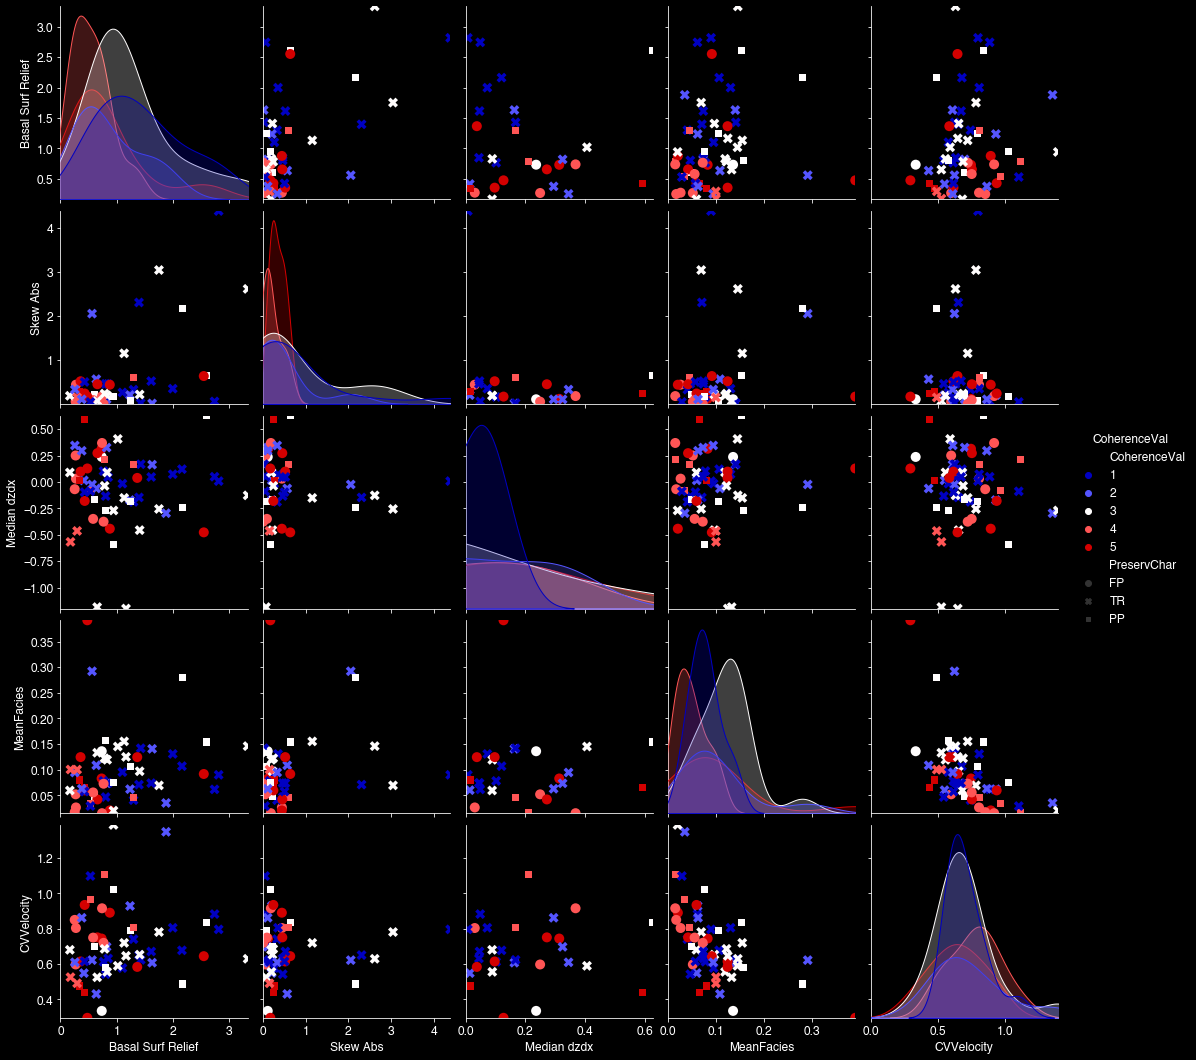

In [151]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(style = allbars['PreservChar'], linewidth=0, s = 100, edgecolor = 'w'),
                         vars = ['Basal Surf Relief', 'Skew Abs', 'Median dzdx', 'MeanFacies', 'CVVelocity'], hue = 'CoherenceVal', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 5))
    snsvars = ['Basal Surf Relief', 'Skew Abs', 'Median dzdx', 'MeanFacies', 'CVVelocity']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))
        
    for i, v in enumerate(snsvars):
        pplot.axes[i, 0].set(ylim=(allbars[v].min(), allbars[v].max()))
        
    # pplot.map_lower(sns.kdeplot, levels=2, color="w")

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
# plt.savefig(f'{savefilesto}/pairplot-cbbsr-bin.png', dpi = 200)

<Figure size 1080x1080 with 0 Axes>

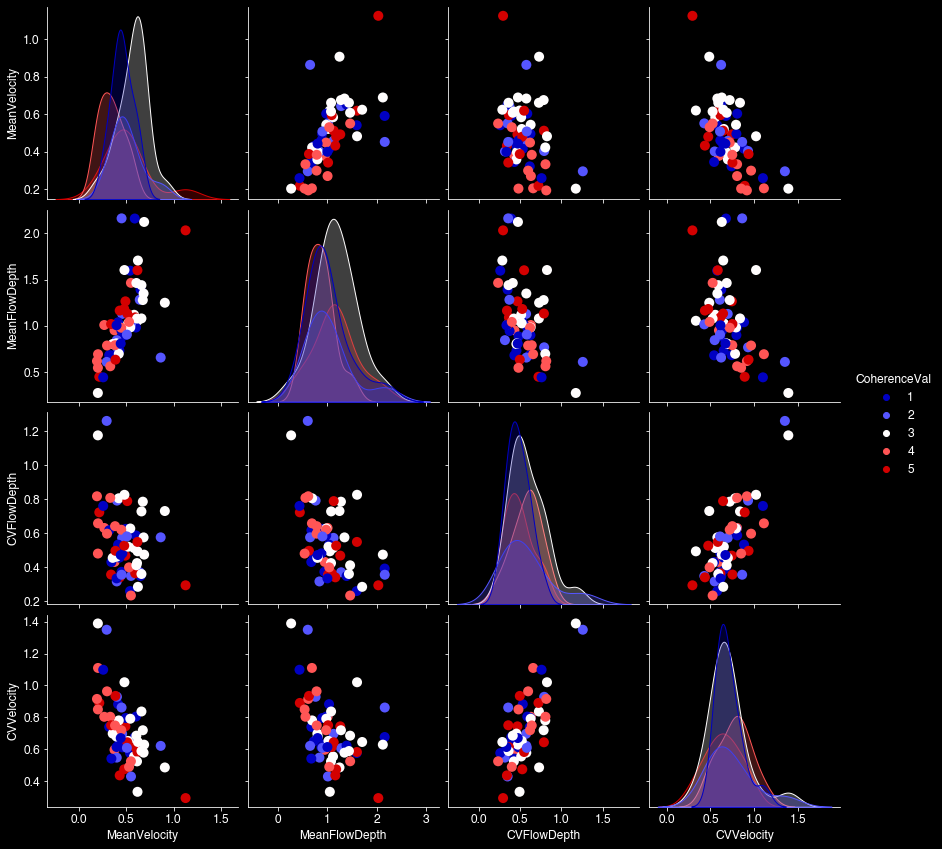

In [152]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    sns.pairplot(allbars, plot_kws=dict(marker="o", linewidth=0, s = 100, edgecolor = 'w'), 
                 vars = ['MeanVelocity', 'MeanFlowDepth', 'CVFlowDepth', 'CVVelocity'],
                hue = 'CoherenceVal', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 5))
    snsvars = ['MeanVelocity', 'MeanFlowDepth', 'CVFlowDepth', 'CVVelocity']
    
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))
        
    for i, v in enumerate(snsvars):
        pplot.axes[i, 0].set(ylim=(allbars[v].min(), allbars[v].max()))

IndexError: index 9 is out of bounds for axis 1 with size 9

<Figure size 1440x1080 with 0 Axes>

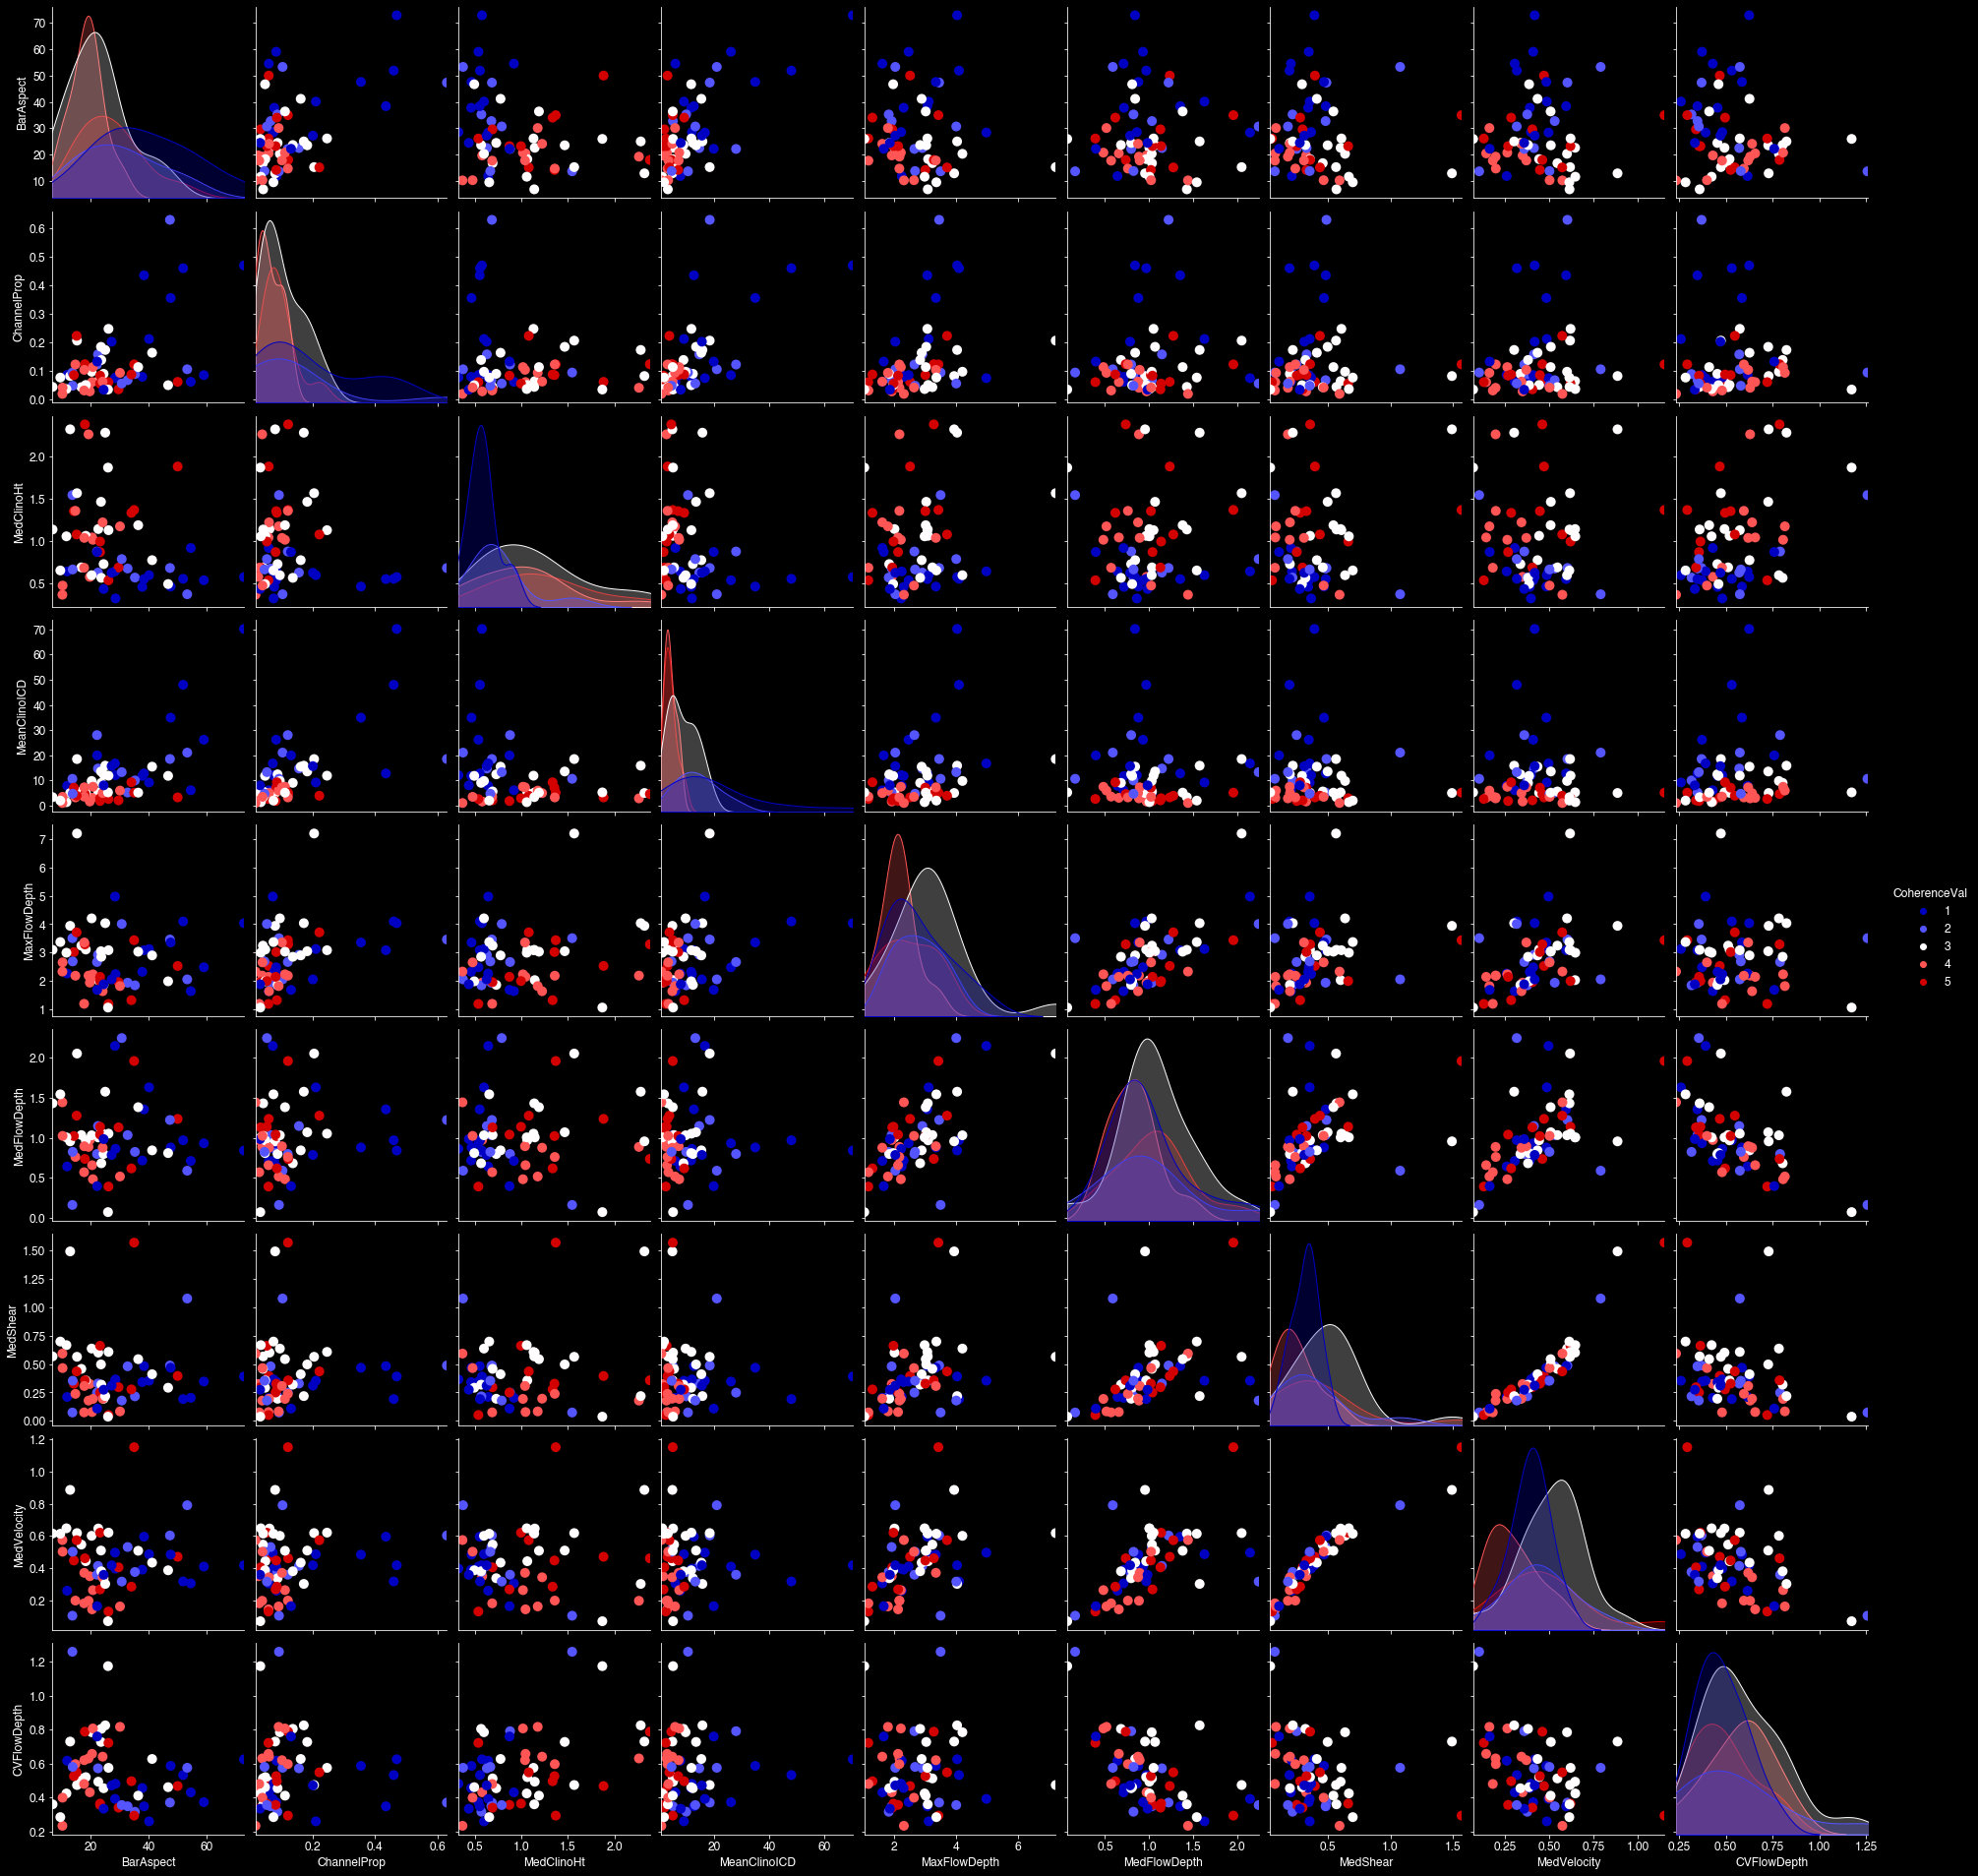

In [155]:
plt.figure(figsize = (20, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars, 
                         plot_kws=dict(marker="o", linewidth=0, s = 100, edgecolor = 'w'),
                         vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth'], hue = 'CoherenceVal', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 5))
    snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Skew Abs', 'Basal Surf Relief']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))

    # pplot.set(xlim=(0, None))
    # pplot.axes[-1, 0].set(xlim=(0, 600))
    # plt.savefig(f'{savefilesto}/pairplot-test.png', dpi = 200)

In [32]:
sns.mpl_palette('seismic', 3)

[(0.00392156862745098, 0.00392156862745098, 1.0),
 (1.0, 0.9921568627450981, 0.9921568627450981),
 (0.9941176470588236, 0.0, 0.0)]

ValueError: The palette list has the wrong number of colors.

<Figure size 1080x1080 with 0 Axes>

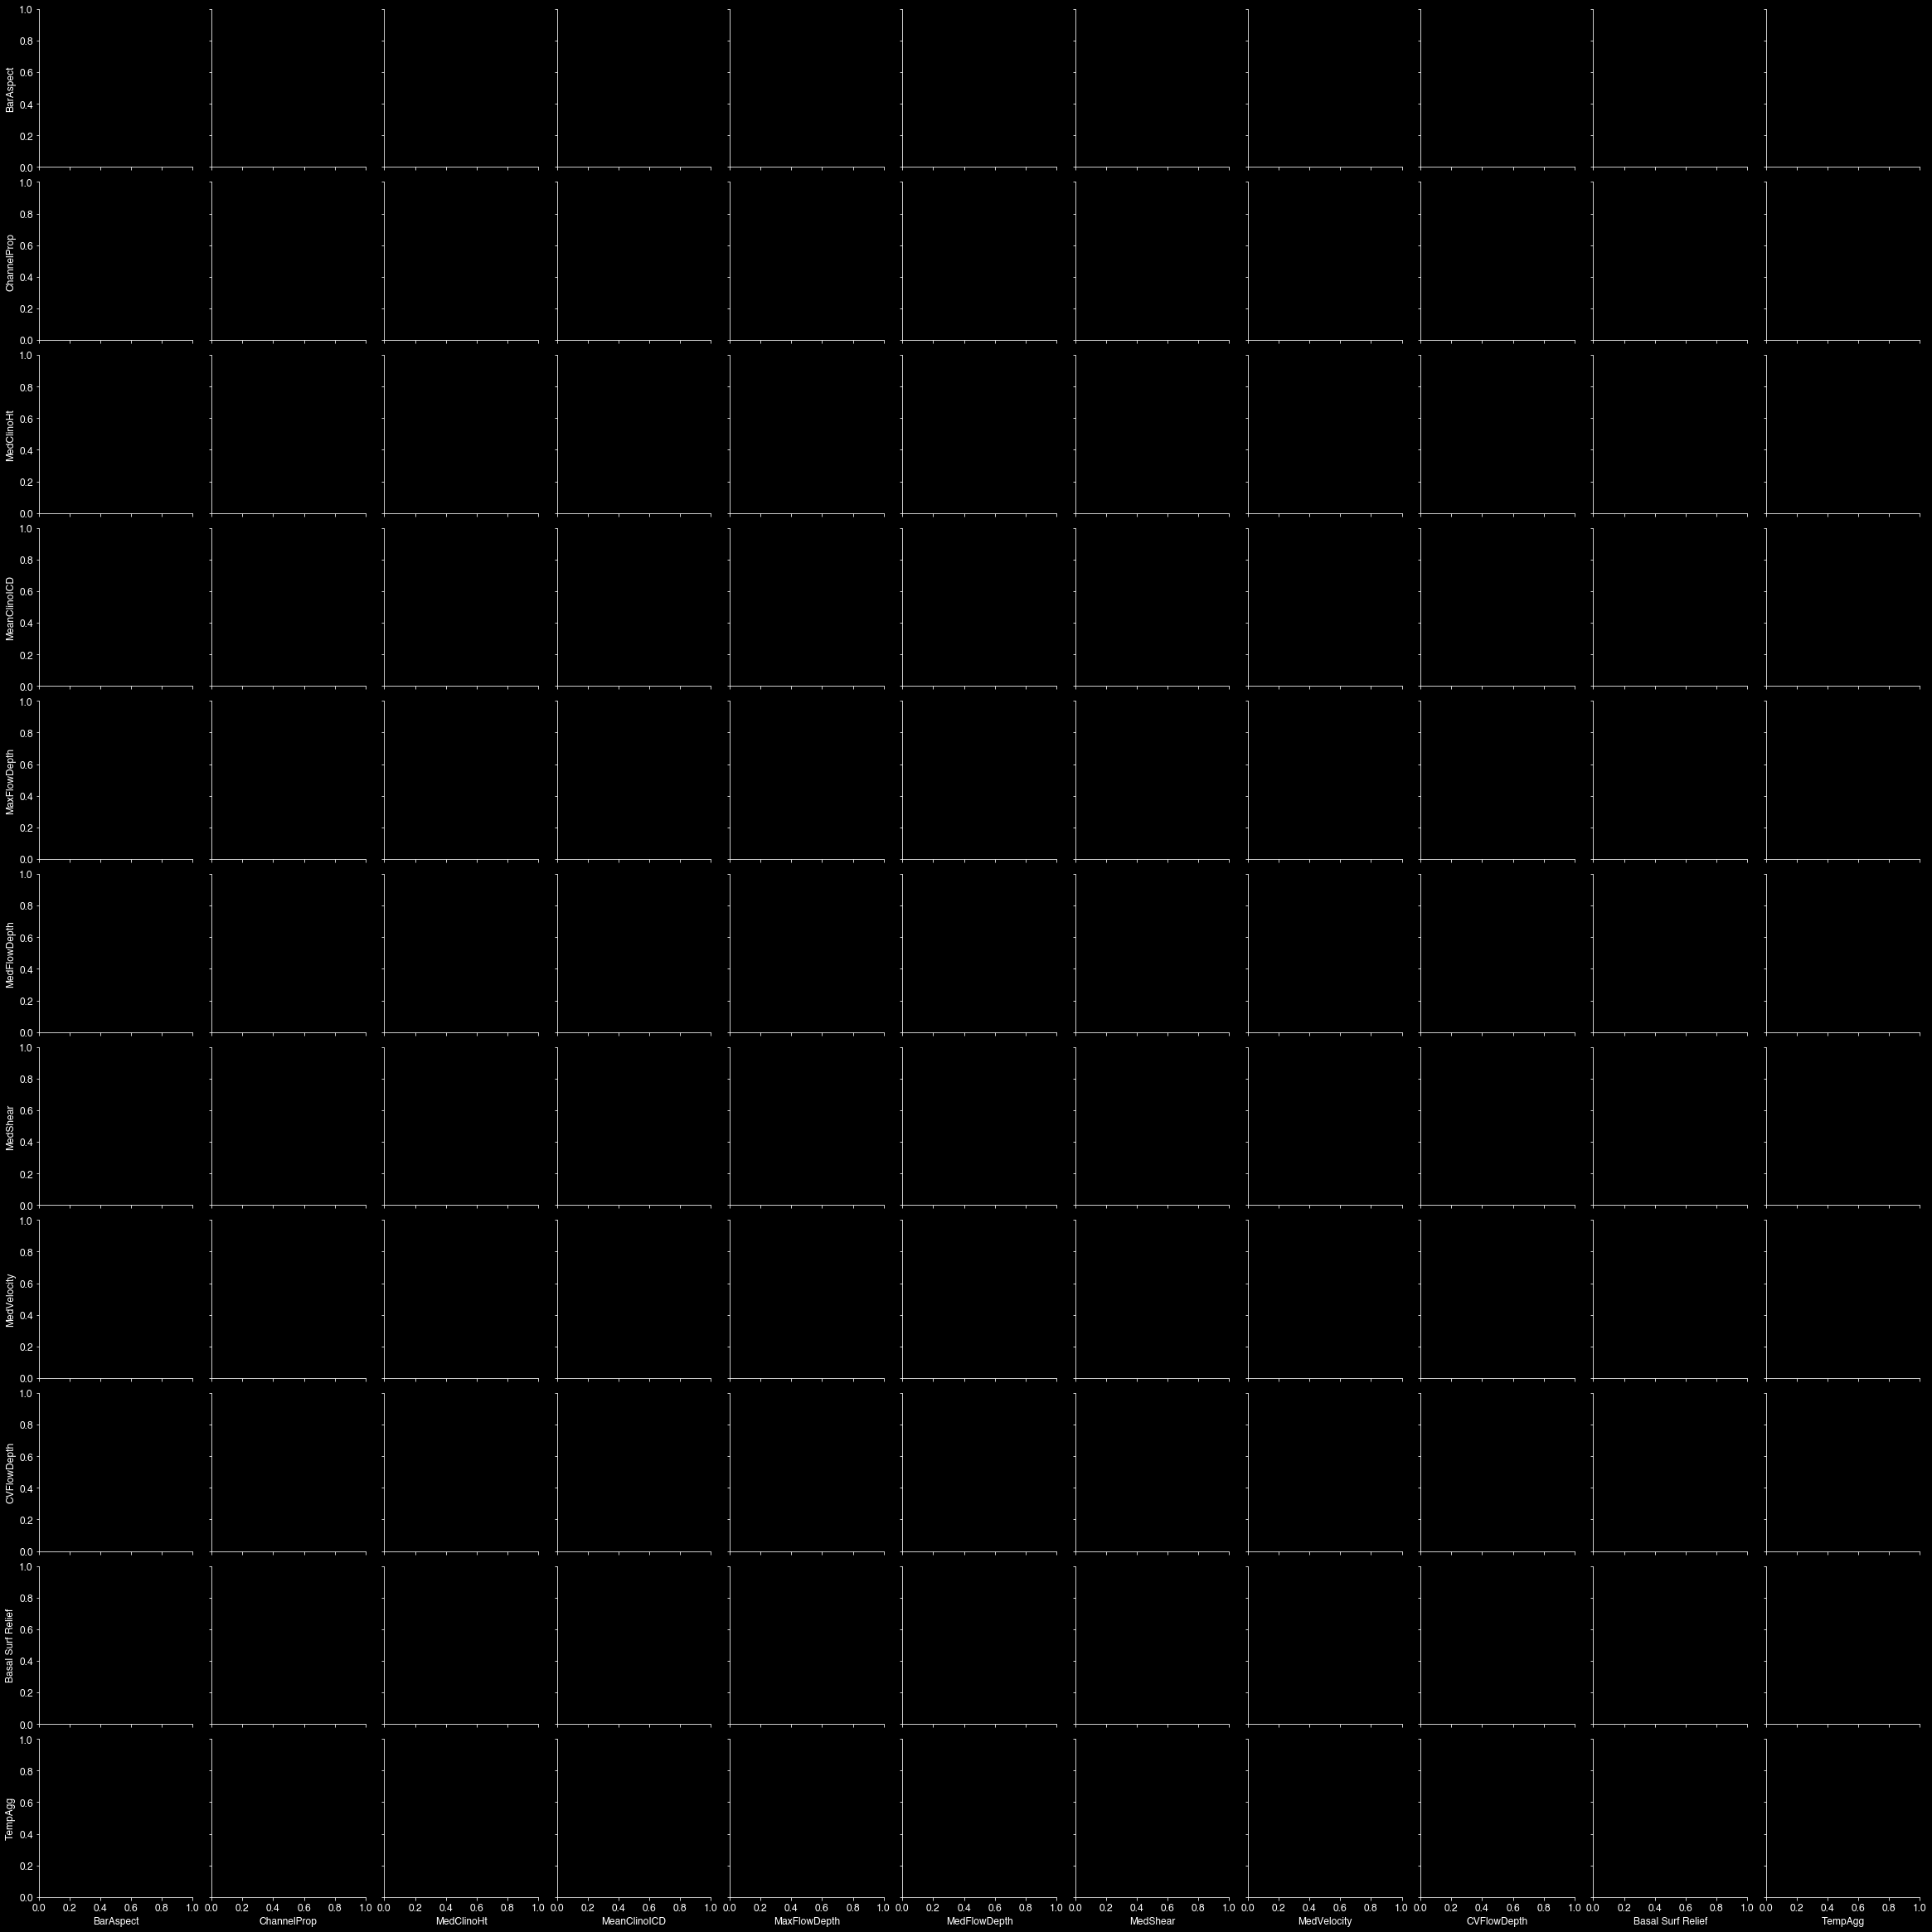

In [38]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(marker="o", linewidth=0, s = 100, edgecolor = 'w'),
                         vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Basal Surf Relief', 'TempAgg'], hue = 'Skew Binned', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 3))
    snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness', 'TempAgg']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbskew.png', dpi = 200)

<Figure size 1080x1080 with 0 Axes>

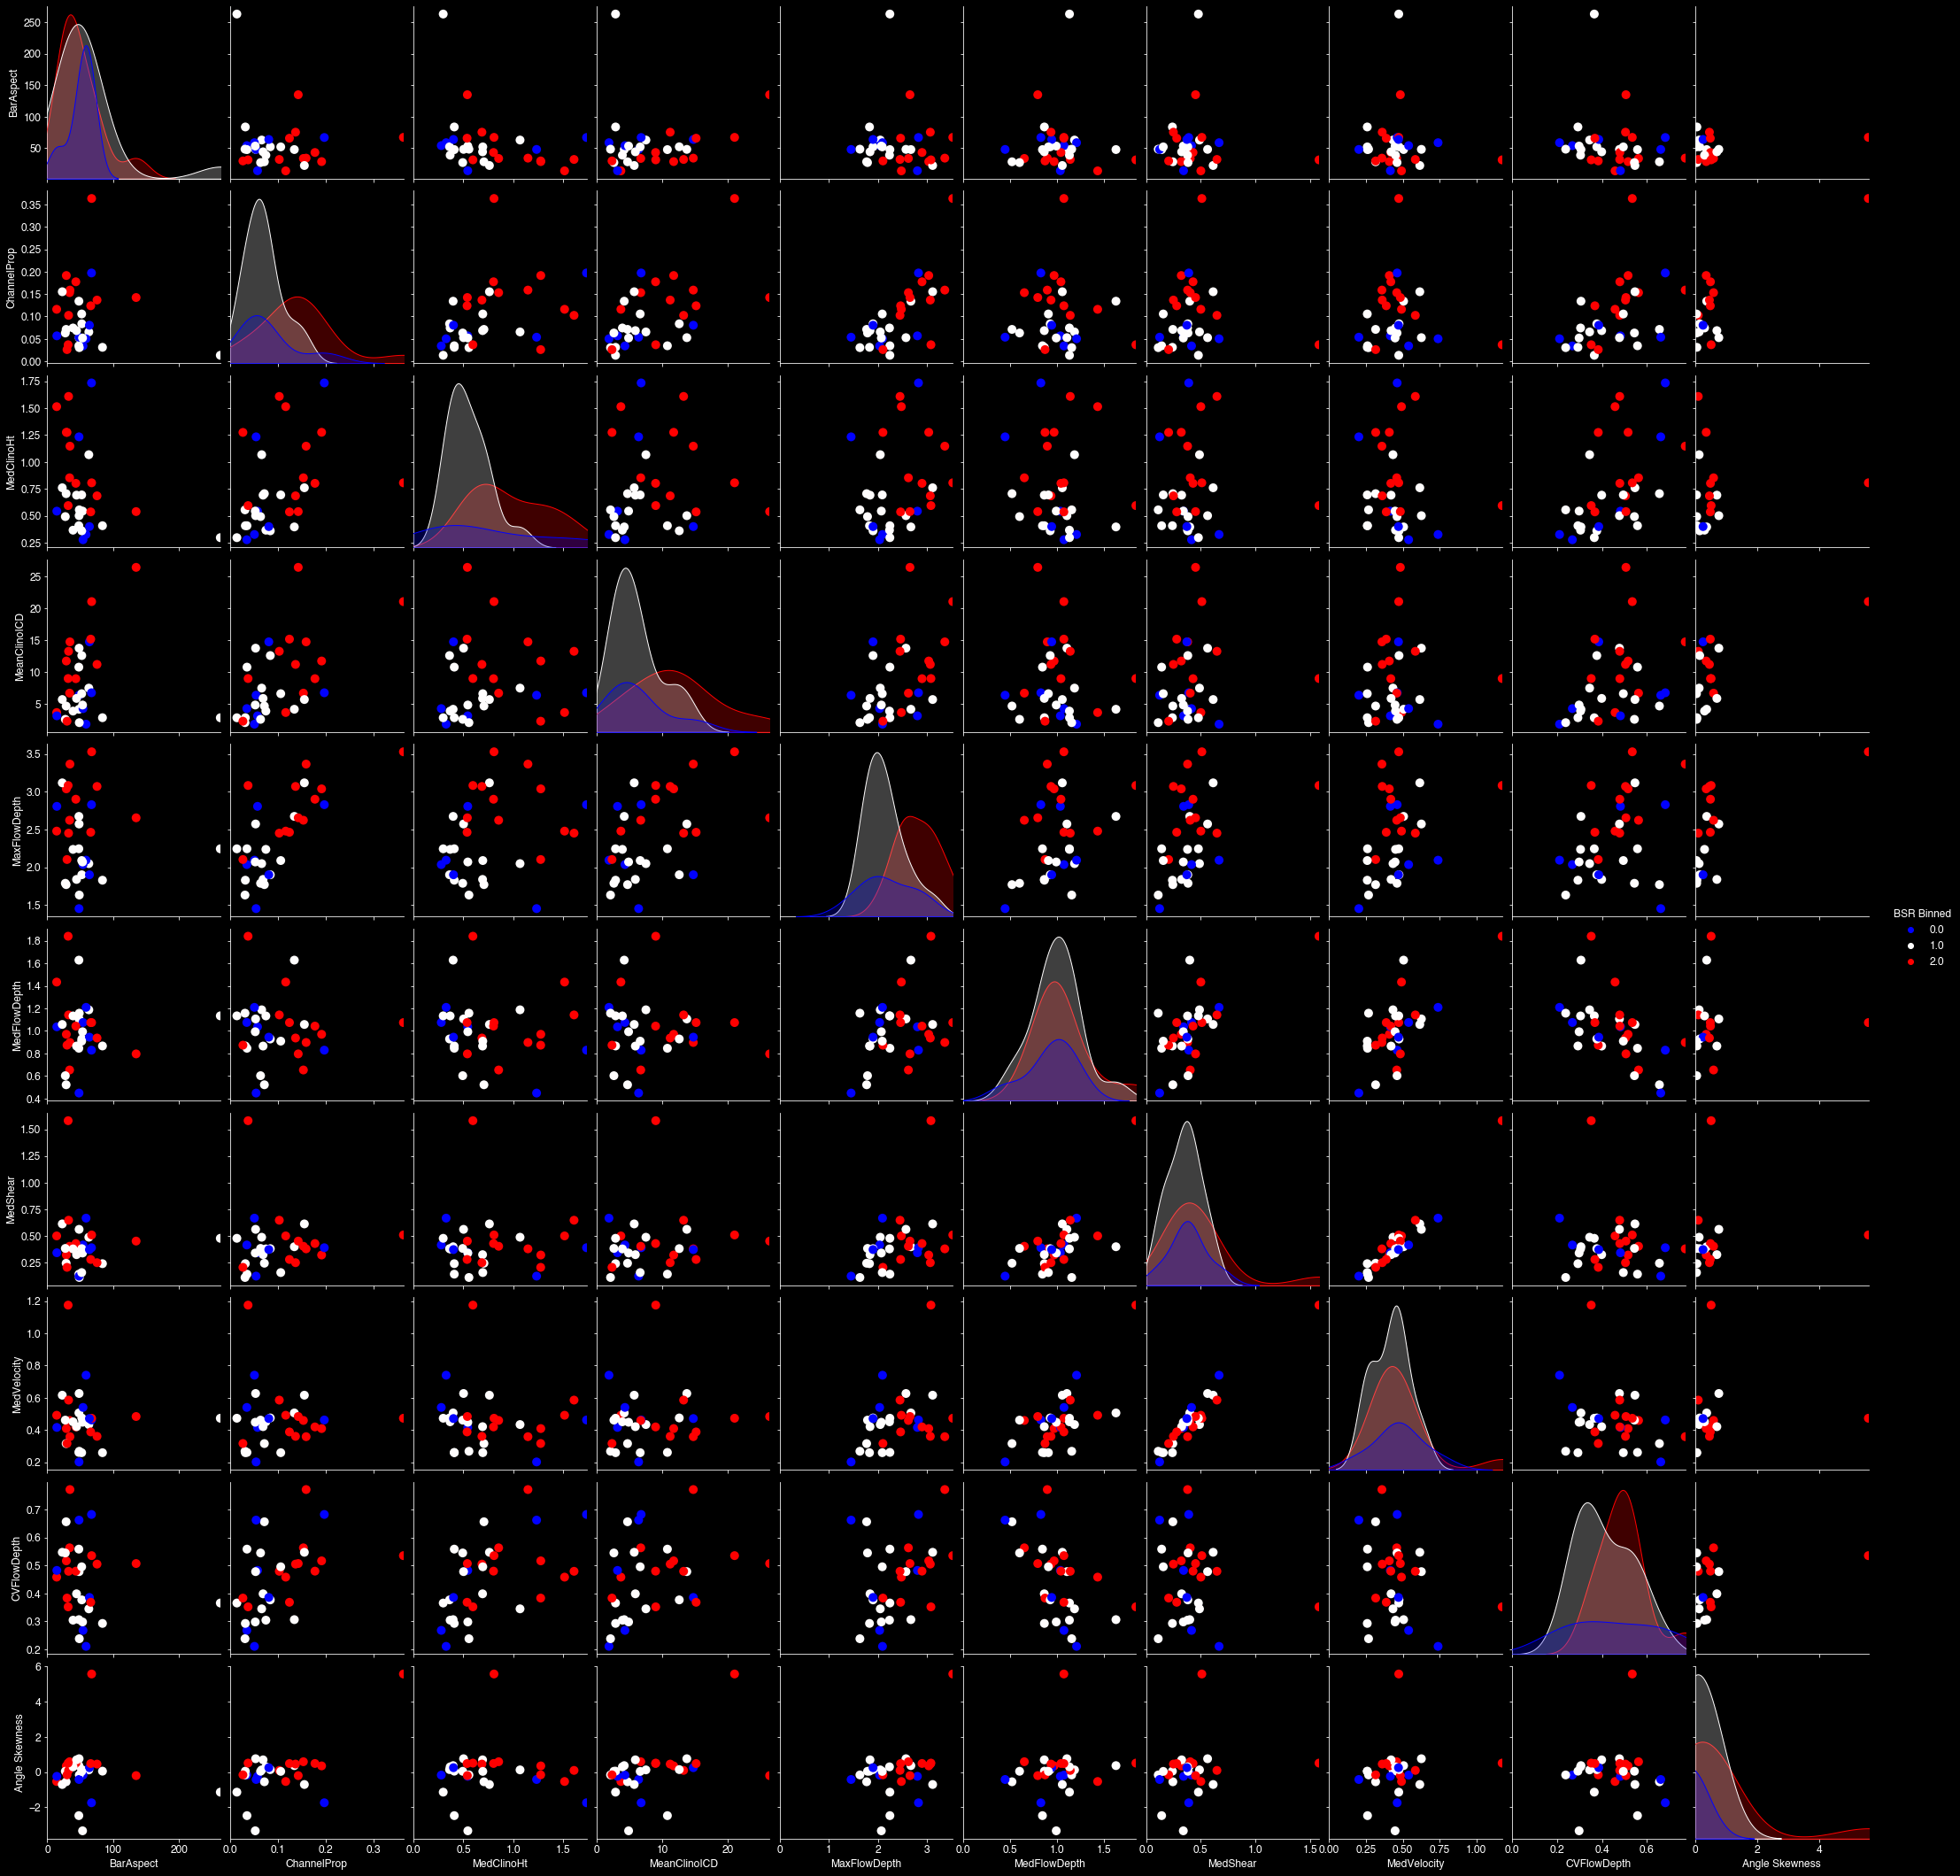

In [49]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(marker="o", linewidth=0, s = 100, edgecolor = 'w'),
                         vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness'], hue = 'BSR Binned', height = 3, aspect = 1, palette = sns.mpl_palette('seismic', 3))
    snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbbsr-bin.png', dpi = 200)

<Figure size 1080x1080 with 0 Axes>

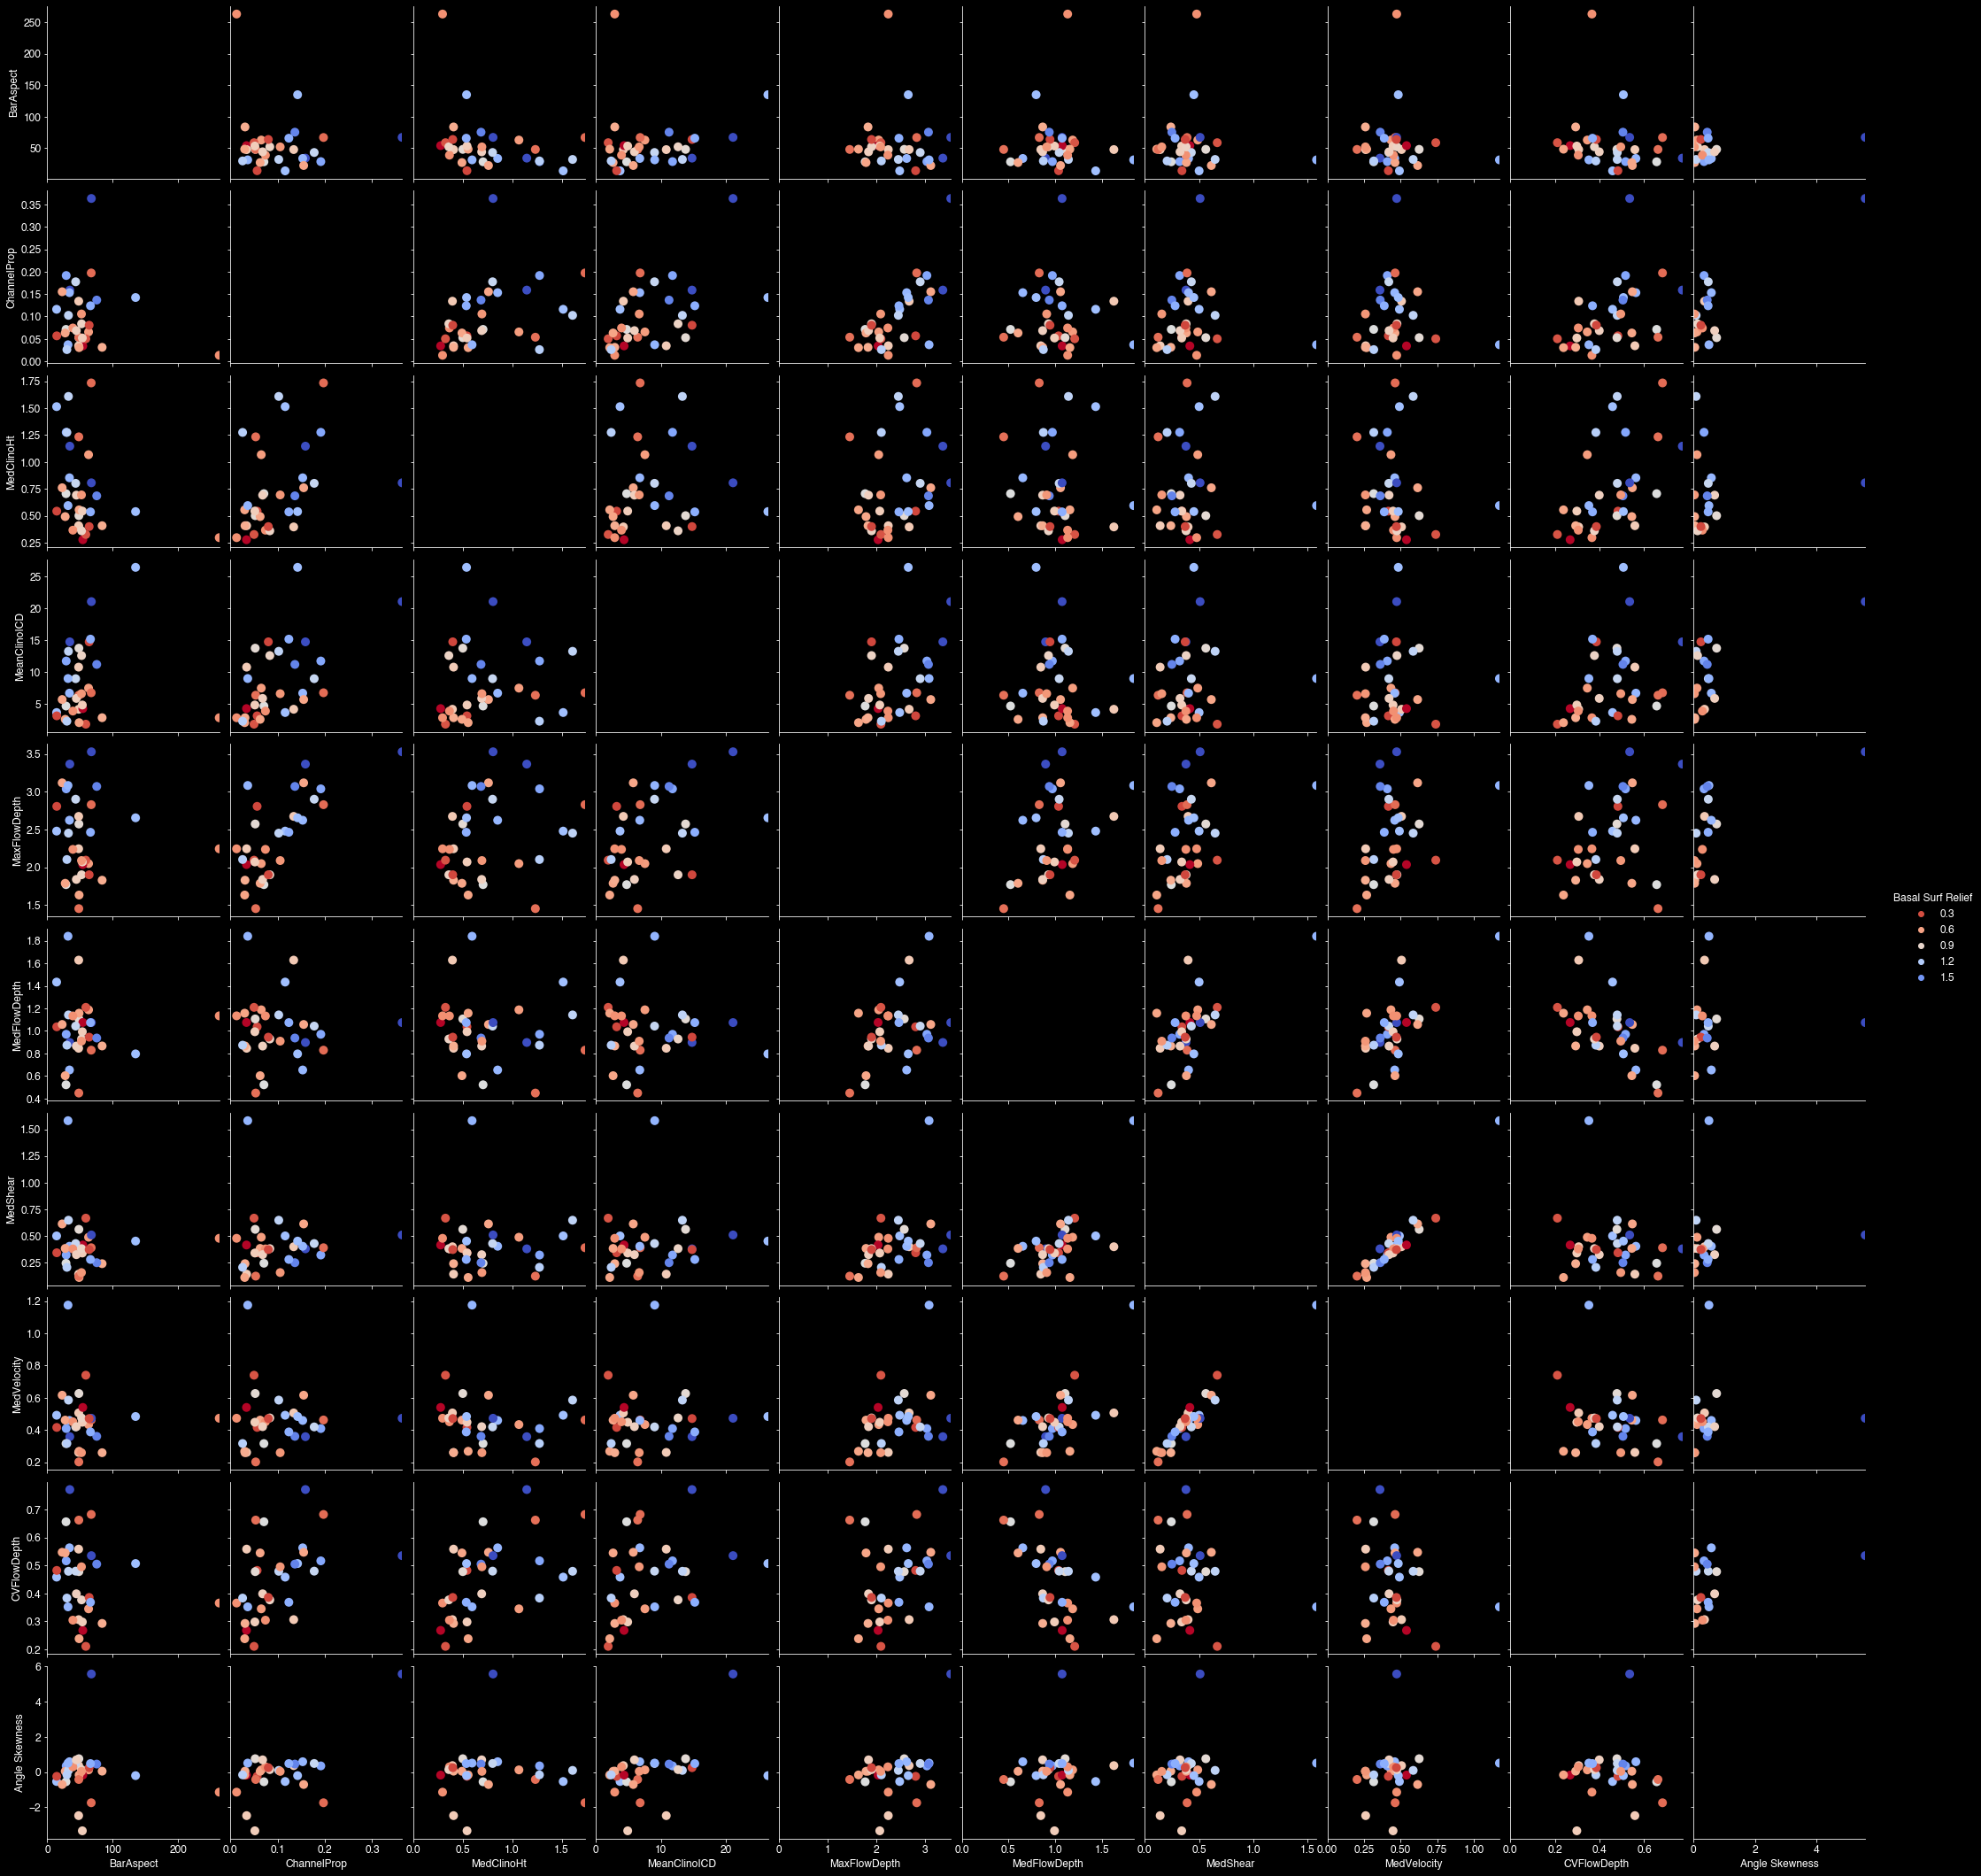

In [18]:
plt.figure(figsize = (15, 15))
with plt.style.context('dark_background'):
    pplot = sns.pairplot(allbars,
                         plot_kws=dict(marker="o", linewidth=0, s = 100),
                         vars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness'], hue = 'Basal Surf Relief', height = 3, aspect = 1, palette = 'coolwarm_r')
    snsvars = ['BarAspect', 'ChannelProp', 'MedClinoHt', 'MeanClinoICD', 'MaxFlowDepth', 'MedFlowDepth',
                                    'MedShear', 'MedVelocity', 'CVFlowDepth', 'Angle Skewness']
    for i, v in enumerate(snsvars):
        pplot.axes[-1, i].set(xlim=(0, allbars[v].max()))

# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
plt.savefig(f'{savefilesto}/pairplot-cbbsr.png', dpi = 200)

In [28]:
pplot = sns.pairplot(allbars, vars = ['Angle Skewness', 'Basal Surf Relief'], hue =allbars['BarHeight'], palette = 'Spectral')
plot_kws={"s": 3}

snsvars = ['Angle Skewness', 'Basal Surf Relief']
for i, v in enumerate(snsvars):
    pplot.axes[-1, i].set(xlim=(allbars[v].min(), allbars[v].max()))
    
# pplot.set(xlim=(0, None))
# pplot.axes[-1, 0].set(xlim=(0, 600))
# plt.savefig(f'{savefilesto}/pairplot-cbskew.png', dpi = 200)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
sns.scatterplot(allbars['Angle Skewness'], allbars['Basal Surf Relief'], hue = allbars[''])